In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
df = pd.read_csv("../Homework1/students_score_clean.csv",index_col = 0)
df.head()

,StudentId,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
Unnamed: 0,,,,,,,,,,,,,,,,,,,
0.0,520645.0,female,2,1,standard,1,1,1,1,3.0,1,1,71.0,71.0,74.0,1.0,0.0,0.0,1.0
1.0,303683.0,female,2,5,standard,1,1,2,1,0.0,2,0,69.0,90.0,88.0,1.0,0.0,0.0,1.0
2.0,457351.0,female,1,3,standard,1,2,2,1,4.0,1,1,87.0,93.0,91.0,1.0,0.0,0.0,1.0
3.0,812988.0,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45.0,56.0,42.0,0.0,1.0,1.0,0.0
4.0,594678.0,male,2,5,standard,1,1,2,1,0.0,1,0,76.0,78.0,75.0,0.0,1.0,0.0,1.0


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [44]:
# a) 
scores = ["MathScore", "ReadingScore", "WritingScore"]

for score in scores:
    print(f' {score}\n\tMean: {df[score].mean()}\n\tMedian: {df[score].median()}\n\tAverage: {df[score].mean()}')

print('\n')

# b)
genders = ["male", "female"]

for gender in genders:
    gender_data = df.query(f'Gender == "{gender}"')

    for score in scores:
        print(f'{gender}s {score}\n\tMean: {gender_data[score].mean()}\n\tMedian: {gender_data[score].median()}\n\tAverage: {gender_data[score].mean()}')

print('\n')

# Alternatively, you can use groupby for a concise summary
grouped_data = df.groupby('Gender')

for score in scores:
    print(f'{score}')
    print(grouped_data[score].agg(['mean', 'median', 'std']))
    print("\n")

# c)
for score in scores:
    print(f'Coefficient of variation for {score}:')
    
    for gender in genders:
        gender_data = df[df['Gender'] == gender]
        cv = gender_data[score].std() / gender_data[score].mean()
        print(f'\t{gender}s: {cv}')

    print('\n')

 MathScore
	Mean: 66.59916676222146
	Median: 67.0
	Average: 66.59916676222146
 ReadingScore
	Mean: 69.39983946795093
	Median: 70.0
	Average: 69.39983946795093
 WritingScore
	Mean: 68.43018766960975
	Median: 69.0
	Average: 68.43018766960975


males MathScore
	Mean: 69.0767395320197
	Median: 69.0
	Average: 69.0767395320197
males ReadingScore
	Mean: 65.84744458128078
	Median: 66.0
	Average: 65.84744458128078
males WritingScore
	Mean: 63.91156096059113
	Median: 64.0
	Average: 63.91156096059113
females MathScore
	Mean: 64.15526535570572
	Median: 64.0
	Average: 64.15526535570572
females ReadingScore
	Mean: 72.90395566016248
	Median: 73.0
	Average: 72.90395566016248
females WritingScore
	Mean: 72.88740414547111
	Median: 73.0
	Average: 72.88740414547111


MathScore
             mean  median        std
Gender                              
female  64.155265    64.0  15.195310
male    69.076740    69.0  15.123428


ReadingScore
             mean  median        std
Gender                          

3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [29]:
from scipy.stats import f_oneway

stat, p = f_oneway(male['MathScore'],female['MathScore'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=689.317, p=0.000
Probably different distributions


4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [30]:
from scipy.stats import kruskal

stat, p = kruskal(male['WritingScore'],female['WritingScore'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2144.586, p=0.000
Probably different distributions


5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

Statistical test for MathScore: t-statistic = -26.254843088468245, p-value = 5.527667130214504e-150
Statistical test for ReadingScore: t-statistic = 39.820734880104865, p-value = 0.0
Statistical test for WritingScore: t-statistic = 49.0823877109499, p-value = 0.0


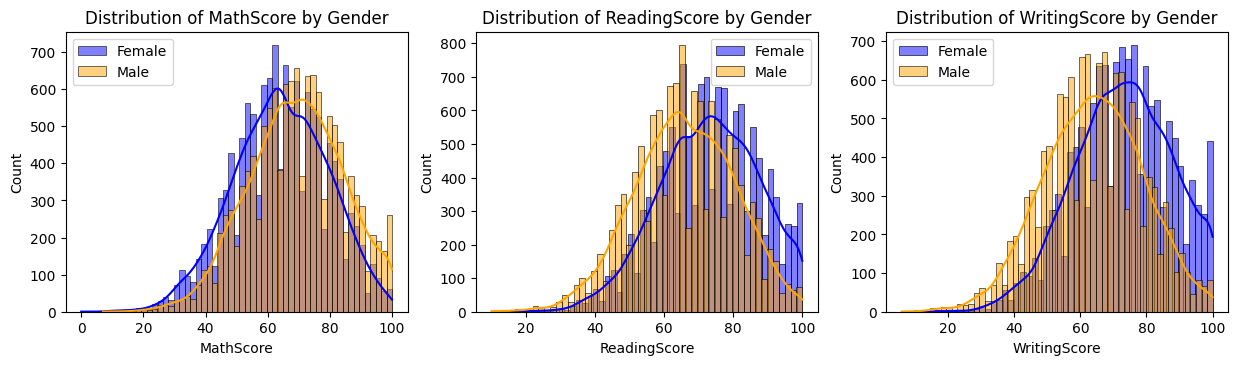

In [36]:
# a)
from scipy.stats import ttest_ind
for column in ['MathScore', 'ReadingScore', 'WritingScore']:
    t_stat, p_value = ttest_ind(female[column], male[column])
    print(f"Statistical test for {column}: t-statistic = {t_stat}, p-value = {p_value}")

# b)
plt.figure(figsize=(15, 8))
for i, column in enumerate(['MathScore', 'ReadingScore', 'WritingScore'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(female[column], kde=True, label='Female', color='blue')
    sns.histplot(male[column], kde=True, label='Male', color='orange')
    plt.title(f'Distribution of {column} by Gender')
    plt.legend()